<a href="https://colab.research.google.com/github/Abhiishek11/FractureDetectionusingRADTorch/blob/main/RadTorch_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://download.radtorch.com/ -q

     |████████████████████████████████| 1.9MB 28.4MB/s 


In [ ]:
from radtorch import pipeline, core
from radtorch.settings import *


In [ ]:
data_root = '/content/drive/MyDrive/Colab Notebooks/train_image_paths.csv'


In [ ]:
x = pd.read_csv(data_root, header=None, names=['PATH'])
x

,PATH
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
...,...
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36804,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...
36806,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...


In [ ]:
shoulder_files = []
shoulder_labels = []
for i, r in x.iterrows():
    if 'SHOULDER' in r['PATH']:
        shoulder_files.append('/content/drive/MyDrive/Colab Notebooks/'+r['PATH'])
        if 'positive' in r['PATH']:
            shoulder_labels.append('POSITIVE')
        else:
            shoulder_labels.append('NEGATIVE')

In [ ]:
shoulder_data = pd.DataFrame(zip(shoulder_files,shoulder_labels), columns=['PATH', 'LABEL'])
shoulder_data

,PATH,LABEL
0,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
1,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
2,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
3,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
4,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
...,...,...
8374,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8375,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8376,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8377,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE


In [ ]:
clf = pipeline.Image_Classification(
    data_directory = '/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train', #folder containing images
    table = shoulder_data, #data table we created earlier
    is_dicom = False, #False as these images are not DICOM
    is_path=True,
    image_path_column='PATH', image_label_column='LABEL',
    sampling = 0.25, #use only 25% of the data
    model_arch = 'resnet50',
    pre_trained=True,
    epochs=20 #Train for 20 epochs.
    )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
clf.data_processor.dataset_info(plot=False)

dataset


,Classes,Class Idx,Number of Instances
0,NEGATIVE,0,1055
1,POSITIVE,1,1040
2,Total Instances,,2095


train_dataset


,Classes,Class Idx,Number of Instances
0,NEGATIVE,0,618
1,POSITIVE,1,639
2,Total Instances,,1257


test_dataset


,Classes,Class Idx,Number of Instances
0,NEGATIVE,0,236
1,POSITIVE,1,183
2,Total Instances,,419


valid_dataset


,Classes,Class Idx,Number of Instances
0,NEGATIVE,0,201
1,POSITIVE,1,218
2,Total Instances,,419


In [ ]:
clf.data_processor.dataset_info(plot=True)

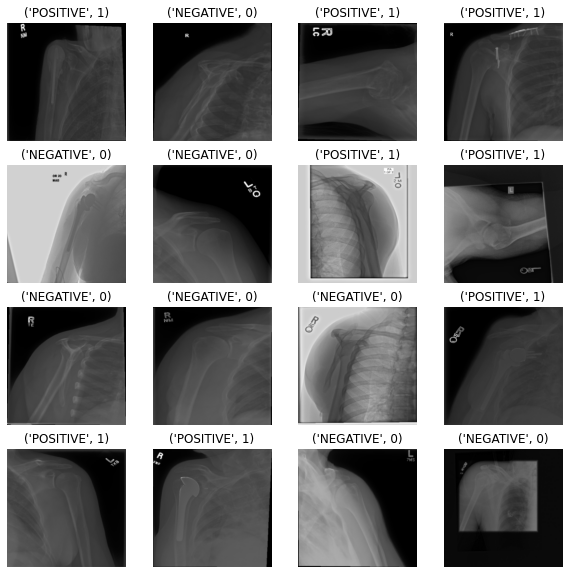

In [ ]:
clf.data_processor.sample()

In [ ]:
clf = pipeline.Image_Classification(
    data_directory = '/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train',
    table = shoulder_data, 
    is_dicom = False, 
    is_path=True,
    image_path_column='PATH', image_label_column='LABEL',
    sampling = 0.25, 
    model_arch = 'resnet50',
    pre_trained=True,
    epochs=20,
    balance_class=True,
    balance_class_method='downsample',
    normalize = ((0,0,0), (1,1,1))
    )

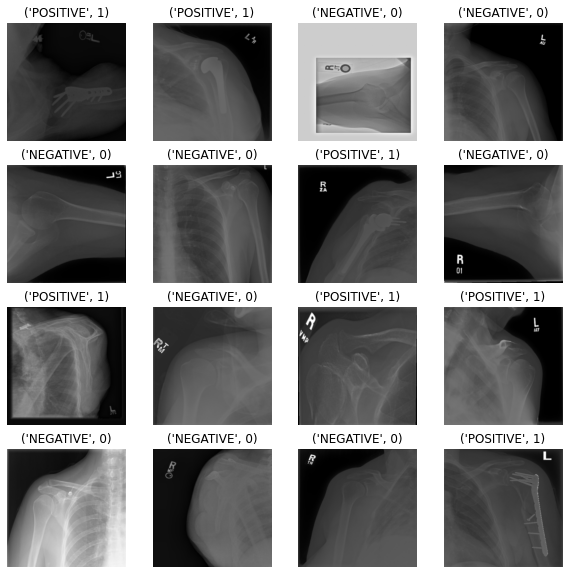

In [ ]:
clf.data_processor.sample()

In [ ]:
clf.run()

[05/21/2021 03:52:15]: Starting Image Classification Pipeline
[05/21/2021 03:52:15]: Random seed 100 set successfully
[05/21/2021 03:52:15]: Loss function selected is CrossEntropyLoss
[05/21/2021 03:52:15]: Optimizer selected is Adam
[05/21/2021 03:52:15]: Random seed 100 set successfully
[05/21/2021 03:52:15]: Starting training at 2021-05-21 03:52:15.931092


[05/21/2021 04:02:42]: Epoch : 000/20 : [Training: Loss: 0.5953, Accuracy: 67.9612%]  [Validation : Loss : 0.7498, Accuracy: 64.2005%] [Time: 615.3994s]
[05/21/2021 04:03:08]: Epoch : 001/20 : [Training: Loss: 0.3231, Accuracy: 87.6214%]  [Validation : Loss : 0.8469, Accuracy: 64.6778%] [Time: 26.0106s]
[05/21/2021 04:03:34]: Epoch : 002/20 : [Training: Loss: 0.1964, Accuracy: 92.7994%]  [Validation : Loss : 1.0081, Accuracy: 69.9284%] [Time: 26.3605s]
[05/21/2021 04:04:00]: Epoch : 003/20 : [Training: Loss: 0.1368, Accuracy: 95.3074%]  [Validation : Loss : 1.3450, Accuracy: 67.3031%] [Time: 26.0786s]
[05/21/2021 04:04:26]: Epoch : 004/20 : [Training: Loss: 0.1004, Accuracy: 96.0356%]  [Validation : Loss : 1.0775, Accuracy: 71.1217%] [Time: 26.0496s]
[05/21/2021 04:04:52]: Epoch : 005/20 : [Training: Loss: 0.1366, Accuracy: 94.9029%]  [Validation : Loss : 1.1303, Accuracy: 69.9284%] [Time: 26.1629s]
[05/21/2021 04:05:18]: Epoch : 006/20 : [Training: Loss: 0.1383, Accuracy: 94.6602%]  [

In [ ]:
clf.metrics()

In [ ]:
clf.train_metrics

,Train_Loss,Valid_Loss,Train_Accuracy,Valid_Accuracy
0,0.595290,0.749843,0.679612,0.642005
1,0.323150,0.846927,0.876214,0.646778
2,0.196362,1.008108,0.927994,0.699284
3,0.136779,1.345026,0.953074,0.673031
4,0.100368,1.077468,0.960356,0.711217
5,0.136609,1.130325,0.949029,0.699284
6,0.138250,0.837072,0.946602,0.687351
7,0.086877,1.137104,0.973301,0.692124
8,0.035542,1.506578,0.991100,0.661098
9,0.091113,1.282735,0.963592,0.687351


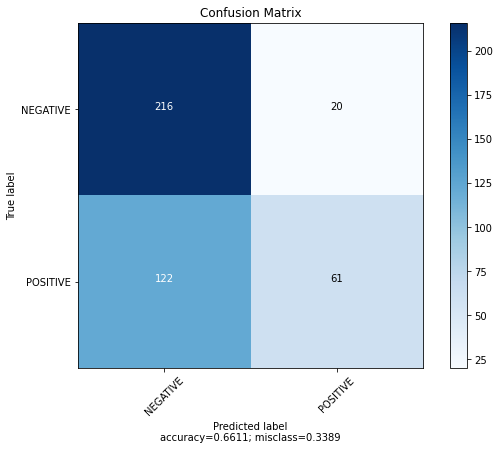

In [ ]:
clf.classifier.confusion_matrix()

In [ ]:
clf.classifier.show_model_layers()

['',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1',
 'layer1.0',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.relu',
 'layer1.0.downsample',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.relu',
 'layer1.2',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.relu',
 'layer2',
 'layer2.0',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.relu',
 'layer2.0.downsample',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.conv3',
 'layer2.1.bn3',
 'layer2.1.relu',
 'layer2.2',
 'layer2.2.conv1',
 'layer2.2.bn1',
 'layer2.2.conv2',
 'layer2.2.bn2',
 '

predicted class ids 1	 probability 0.588649570941925


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local

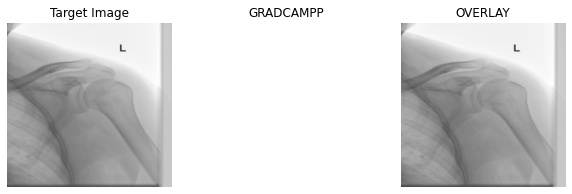

In [ ]:
clf.cam(target_layer = clf.trained_model.layer4[2].conv3,target_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11186/study1_positive/image1.png', type='gradcampp')

In [ ]:
clf.data_processor.class_table()

,Label,Label_idx
0,NEGATIVE,0
1,POSITIVE,1


In [ ]:
clf.classifier.predict(input_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11186/study1_positive/image1.png')

,LABEL,LABEL_IDX,PREDICTION_ACCURACY
0,NEGATIVE,0,0.4114
1,POSITIVE,1,0.5886


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 0	 probability 0.9999657869338989


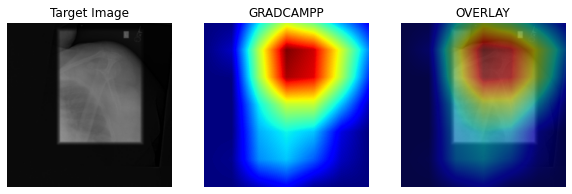

In [ ]:
clf.cam(target_layer = clf.trained_model.layer4[2].conv3,target_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11187/study1_negative/image2.png', type='gradcampp')

In [ ]:
clf.classifier.predict(input_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11187/study1_negative/image2.png')

,LABEL,LABEL_IDX,PREDICTION_ACCURACY
0,NEGATIVE,0,1.0000
1,POSITIVE,1,0.0000


predicted class ids 1	 probability 0.9919987320899963


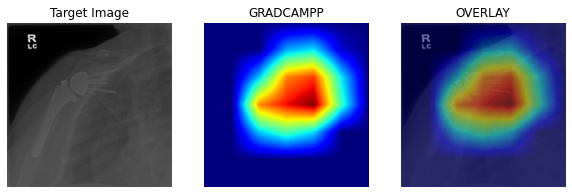

In [ ]:
clf.cam(target_layer = clf.trained_model.layer4[2].conv3,target_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11290/study1_positive/image3.png', type='gradcampp')

In [ ]:
clf.classifier.predict(input_image_path='/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/valid/XR_SHOULDER/patient11290/study1_positive/image3.png')

,LABEL,LABEL_IDX,PREDICTION_ACCURACY
0,NEGATIVE,0,0.0080
1,POSITIVE,1,0.9920


In [ ]:
clf.export(output_path='/content/drive/MyDrive/Colab Notebooks/trained_pipeline.rt')

[01/06/2021 05:38:18]: Pipeline exported successfully to /content/drive/MyDrive/Colab Notebooks/trained_pipeline.rt


In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
import keras

In [ ]:
clf.export(output_path='/content/drive/MyDrive/Colab Notebooks/model.h5')

[05/21/2021 04:15:41]: Pipeline exported successfully to /content/drive/MyDrive/Colab Notebooks/model.h5


In [ ]:
clf.save('model.h5')